In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
# @title Default title text
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/food_data/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


In [ ]:
# @title Default title text
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/food_data/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 351 files belonging to 36 classes.


In [ ]:
# @title Default title text
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/food_data/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


In [5]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img,img_to_array
print(tf.__version__)

2.13.0


In [6]:
# Create a list with the filepaths for training and testing
train_dir = Path('/content/drive/MyDrive/food_data/train')
train_filepaths = list(train_dir.glob(r'**/*.jpg'))

In [7]:
test_dir = Path('/content/drive/MyDrive/food_data/test')
test_filepaths = list(test_dir.glob(r'**/*.jpg'))

In [8]:
val_dir = Path('/content/drive/MyDrive/food_data/validation')
val_filepaths = list(test_dir.glob(r'**/*.jpg'))

In [9]:
def image_processing(filepath):
    """ Create a DataFrame with the filepath and the labels of the pictures
    """

    labels = [str(filepath[i]).split("/")[-2] \
              for i in range(len(filepath))]

    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    # Concatenate filepaths and labels
    df = pd.concat([filepath, labels], axis=1)

    # Shuffle the DataFrame and reset index
    df = df.sample(frac=1).reset_index(drop = True)

    return df

In [10]:
train_df = image_processing(train_filepaths)
test_df = image_processing(test_filepaths)
val_df = image_processing(val_filepaths)

In [11]:
print('-- Training set --\n')
print(f'Number of pictures: {train_df.shape[0]}\n')
print(f'Number of different labels: {len(train_df.Label.unique())}\n')
print(f'Labels: {train_df.Label.unique()}')

-- Training set --

Number of pictures: 2800

Number of different labels: 36

Labels: ['mango' 'cucumber' 'onion' 'turnip' 'pomegranate' 'pineapple' 'ginger'
 'corn' 'jalepeno' 'sweetcorn' 'beetroot' 'tomato' 'spinach' 'lemon'
 'kiwi' 'lettuce' 'peas' 'pear' 'sweetpotato' 'chilli pepper'
 'cauliflower' 'garlic' 'soy beans' 'watermelon' 'cabbage' 'eggplant'
 'orange' 'potato' 'raddish' 'bell pepper' 'capsicum' 'banana' 'grapes'
 'carrot' 'paprika' 'apple']


In [12]:
train_df.head(5)

,Filepath,Label
0,/content/drive/MyDrive/food_data/train/mango/I...,mango
1,/content/drive/MyDrive/food_data/train/cucumbe...,cucumber
2,/content/drive/MyDrive/food_data/train/onion/I...,onion
3,/content/drive/MyDrive/food_data/train/turnip/...,turnip
4,/content/drive/MyDrive/food_data/train/pomegra...,pomegranate


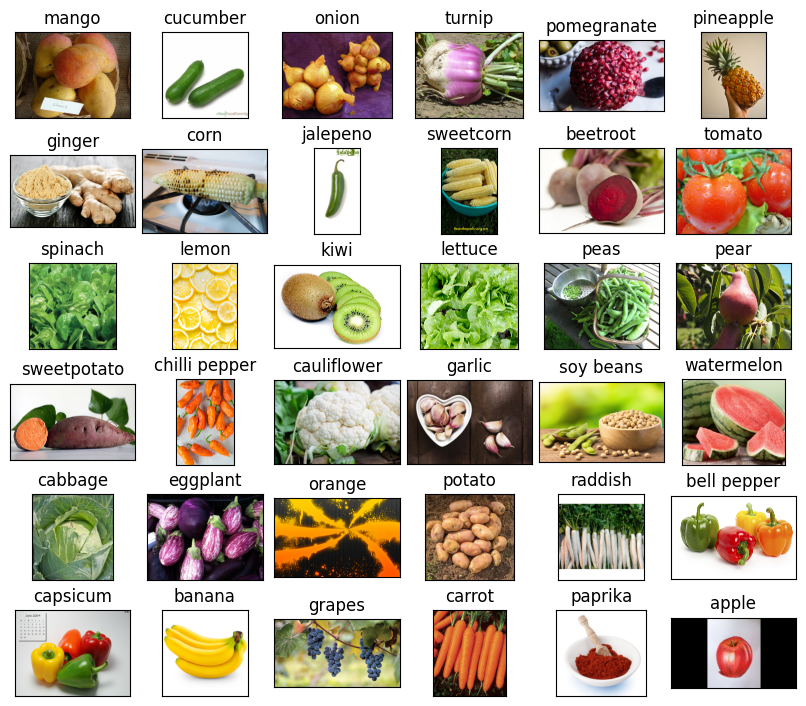

In [13]:
# Create a DataFrame with one Label of each category
df_unique = train_df.copy().drop_duplicates(subset=["Label"]).reset_index()

# Display some pictures of the dataset
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(8, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df_unique.Filepath[i]))
    ax.set_title(df_unique.Label[i], fontsize = 12)
plt.tight_layout(pad=0.5)
plt.show()

In [14]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [15]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 2800 validated image filenames belonging to 36 classes.


In [16]:
val_images = train_generator.flow_from_dataframe(
    dataframe=val_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 334 validated image filenames belonging to 36 classes.


In [17]:
test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 334 validated image filenames belonging to 36 classes.


In [18]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model

# Load the pre-trained VGG16 model (excluding the top layer)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of the base model for your classification task
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
output = Dense(36, activation='softmax')(x)  # NUM_CLASSES is the number of classes in your dataset

# Create the custom model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=10,  # Adjust the number of epochs as needed
    verbose=1
)

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_images)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/10
88/88 [==============================] - 2055s 23s/step - loss: 2.5204 - accuracy: 0.3407 - val_loss: 0.7170 - val_accuracy: 0.8263
Epoch 2/10
88/88 [==============================] - 1975s 22s/step - loss: 0.7519 - accuracy: 0.7807 - val_loss: 0.2698 - val_accuracy: 0.9431
Epoch 3/10
88/88 [==============================] - 2020s 23s/step - loss: 0.2406 - accuracy: 0.9382 - val_loss: 0.1845 - val_accuracy: 0.9611
Epoch 4/10
88/88 [==============================] - 2017s 23s/step - loss: 0.0980 - accuracy: 0.9796 - val_loss: 0.1685 - val_accuracy: 0.9611
Epoch 5/10
88/88 [==============================] - 2014s 23s/step - loss: 0.0701 - accuracy: 0.9854 - val_loss: 0.1785 - val_accuracy: 0.9551
Epoch 6/10
88/88 [==============================] - 2011s 23s/step - loss: 0.0607 - accuracy: 0.9886 - val_loss: 0.1398 - val_accuracy: 0.9641
Epoch 7/10
88/88 [==============================] - 2031s 23s/step - loss: 0.

In [20]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)
# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred1 = [labels[k] for k in pred]
pred1

11/11 [==============================] - 218s 19s/step


['raddish',
 'carrot',
 'pear',
 'eggplant',
 'cauliflower',
 'kiwi',
 'spinach',
 'spinach',
 'paprika',
 'turnip',
 'potato',
 'potato',
 'spinach',
 'peas',
 'eggplant',
 'sweetcorn',
 'kiwi',
 'garlic',
 'orange',
 'tomato',
 'spinach',
 'mango',
 'carrot',
 'cauliflower',
 'peas',
 'capsicum',
 'sweetpotato',
 'corn',
 'banana',
 'sweetpotato',
 'pomegranate',
 'chilli pepper',
 'orange',
 'ginger',
 'tomato',
 'eggplant',
 'paprika',
 'bell pepper',
 'cucumber',
 'garlic',
 'peas',
 'beetroot',
 'soy beans',
 'ginger',
 'onion',
 'raddish',
 'ginger',
 'onion',
 'pear',
 'beetroot',
 'cabbage',
 'turnip',
 'mango',
 'grapes',
 'chilli pepper',
 'raddish',
 'carrot',
 'sweetcorn',
 'paprika',
 'ginger',
 'lettuce',
 'raddish',
 'raddish',
 'eggplant',
 'grapes',
 'paprika',
 'eggplant',
 'pomegranate',
 'lettuce',
 'ginger',
 'jalepeno',
 'paprika',
 'mango',
 'pear',
 'banana',
 'lemon',
 'apple',
 'cucumber',
 'cauliflower',
 'sweetcorn',
 'cucumber',
 'paprika',
 'sweetpotato',

In [22]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = labels[y]
    return res

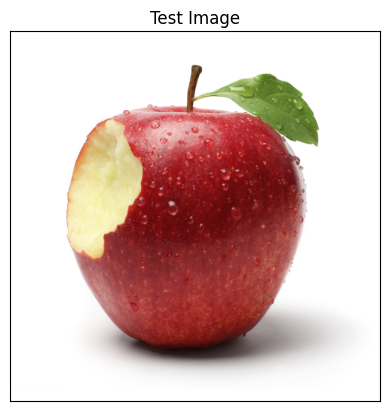

In [23]:
#Test Image Visualization
import cv2
image_path = '/content/drive/MyDrive/food_data/test/apple/Image_1.jpg'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [24]:
img = output('/content/drive/MyDrive/food_data/test/apple/Image_1.jpg')
print('It is : ' , img)

1/1 [==============================] - 1s 704ms/step
It is :  apple


In [25]:
model.save('/content/drive/MyDrive/vgg.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
